In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Reading dataset csv
data= np.genfromtxt('wine_quality.csv',delimiter=',',dtype=None, encoding='UTF-8',names=True)


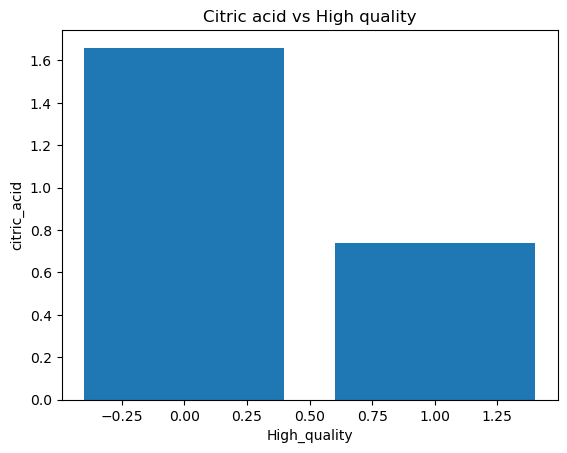

In [2]:
#Preparing data
High_quality = data["High_quality"]
Citric_acid = data["citric_acid"]

#Bar chart
plt.bar(High_quality, Citric_acid)
plt.xlabel("High_quality")
plt.ylabel("citric_acid")
plt.title ("Citric acid vs High quality")
plt.show()
#Lower citric acid levels are assocaited with higher quality

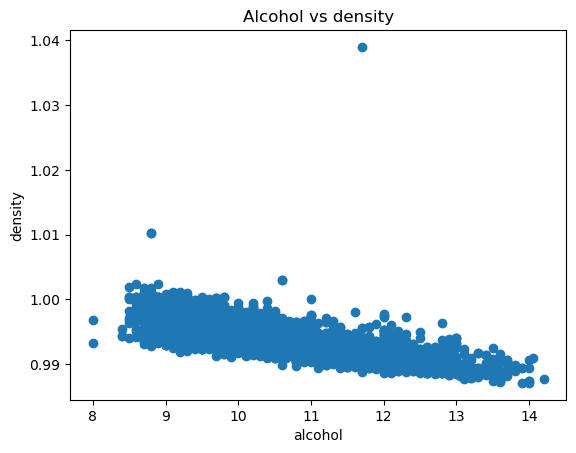

In [27]:
#Preparing data
density = data["density"]
Alcohol = data["alcohol"]

#Scatterplot chart
plt.scatter(Alcohol, density)
plt.xlabel("alcohol")
plt.ylabel("density")
plt.title ("Alcohol vs density")
plt.show()
#Alcohol vs Density has a negative correlation as density decreses, alcohol content increases

Text(0.5, 1.0, 'Histogram')

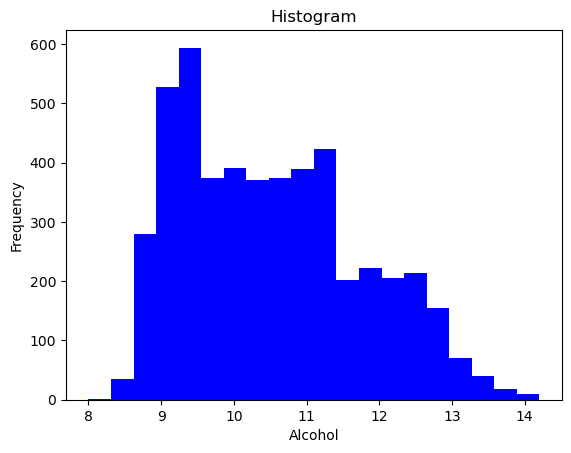

In [26]:
plt.hist(Alcohol,bins=20,color='b')
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.title ("Histogram")
#This shows the distribution of alcohol content in wine
#Wines with an alcohol content of 9 to 9.5% have the highest frequency

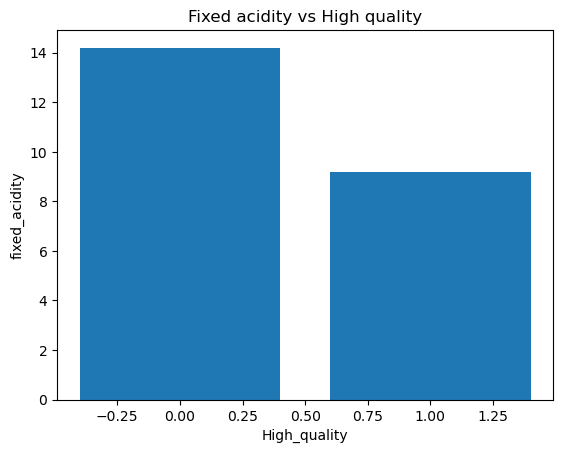

In [5]:
#Preparing data
High_quality = data["High_quality"]
Fixed_acidity = data["fixed_acidity"]

#Bar chart
plt.bar(High_quality, Fixed_acidity)
plt.xlabel("High_quality")
plt.ylabel("fixed_acidity")
plt.title ("Fixed acidity vs High quality")
plt.show()
#A medium amount of fixed acidity is linked to higher quality.

In [6]:
#reshaping variable arrays and concatenating the X variables 
x1= np.reshape(data["fixed_acidity"],(-1,1))
x2= np.reshape(data["volatile_acidity"],(-1,1))
x3= np.reshape(data["citric_acid"],(-1,1))
x4= np.reshape(data["residual_sugar"],(-1,1))
x5= np.reshape(data["pH"],(-1,1))
x6= np.reshape(data["sulphates"],(-1,1))
x7= np.reshape(data["alcohol"],(-1,1))
x8= np.reshape(data["chlorides"],(-1,1))
x9= np.reshape(data["free_sulfur_dioxide"],(-1,1))
x10= np.reshape(data["total_sulfur_dioxide"],(-1,1))
x11= np.reshape(data["density"],(-1,1))

y= data['High_quality']  #y doesn't need reshapaing as it's the target variable

X= np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11), axis=1)

In [7]:
#Normalizing the predictor variables into min and max scale.
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [8]:
X_trans= scaler.transform(X)

In [9]:
#splitting data set into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=0, test_size=0.30)

In [10]:
#handles complex data and leads to higher accuracy in predicting wine quality. The parameters are set to 8 and 1000.
import sklearn.neural_network as ann

ann_model0 = ann.MLPClassifier((8),activation= 'logistic', max_iter= 1000)
ann_model0.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=8, max_iter=1000)

In [11]:
y_pred = ann_model0.predict(X_test)

In [12]:
#ANN accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7931972789115647


In [13]:
#ANN precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5384615384615384

In [14]:
#ANN recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.2012779552715655

In [15]:
#ANN f1
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.2930232558139535

In [16]:
y_pred_proba = ann_model0.predict_proba(X_test)

In [17]:
#ANN roc auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5773027632883324

In [18]:
#KNN predicts wine quality based on the labels of its nearest neighbors 
#The parameter is set to 3
import sklearn.neighbors as nn

knn_model0 = nn.KNeighborsClassifier(n_neighbors=3)
knn_model0.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn_model0.predict(X_test)

In [20]:
#kNN accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8136054421768707


In [21]:
#kNN precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5647840531561462

In [22]:
#kNN recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5431309904153354

In [23]:
#kNN f1
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5537459283387622

In [24]:
y_pred_proba = knn_model0.predict_proba(X_test)

In [25]:
#kNN roc auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7149535678092235

In [ ]:
#These two models have a high accuracy as ANN is 79% and kNN is 81% but ANN has a low score for the rest of the results
#Best suited model for wine prediction for this dataset is kNN